<a href="https://colab.research.google.com/github/Jegge2003/tensordeep/blob/main/tfdeep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE NEEDED LIBRARIES

In [ ]:
#Importing the necessary libraries
import tensorflow as tf
import numpy as np

DEFINING TENSORS IN TENSORFLOW

In [ ]:
#Zero deimensional Tensor
d0 = tf.ones((1,))

#One dimensional Tensor
d1 = tf.ones((2,))

#Two dimensional Tensor
d2 = tf.ones((2, 2))

#Three dimensional Tensor
d3 = tf.ones((2, 2, 2))

In [ ]:
#Printing the initialized tensors
print(d0.numpy())

print(d1.numpy())

print(d2.numpy())

print(d3.numpy())

[1.]
[1. 1.]
[[1. 1.]
 [1. 1.]]
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]


LINEAR REGRESSION WITH TENSORFLOW

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import files
files.upload()

In [ ]:
housing = pd.read_csv('/content/kc_house_data.csv', parse_dates = True)
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
price = np.array(housing['price'], np.float32)
size = np.array(housing['sqft_living'], np.float32)

In [ ]:
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1, np.float32)

In [ ]:
def linear_func(intercept, slope, features = size):
  return intercept + features*slope

In [ ]:
def loss_func(intercept, slope, targets=price, features=size):
  predictions = linear_func(intercept, slope)
  return tf.keras.losses.mse(targets, predictions)

In [ ]:
opt = tf.keras.optimizers.Adam()

In [ ]:
for j in range(1000):
  opt.minimize(lambda: loss_func(intercept, slope), \
  var_list = [intercept, slope])
  print(loss_func(intercept, slope))

In [ ]:
print(intercept.numpy(), slope.numpy())

1.0991763 1.0991884


NEURAL NETWORK WITH TENSORFLOW

In [ ]:
#Importing the needed libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#Splitting dataset into train and test set
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Checking length of X_train
len(X_train)

60000

In [ ]:
#Checking length of X_test
len(X_test)

10000

In [ ]:
#Checking the shape of the first X train input
X_train[0].shape

(28, 28)

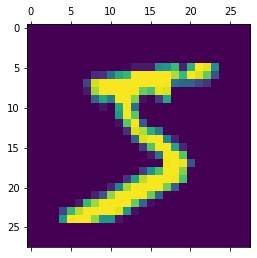

In [ ]:
#Showing the first X input
plt.matshow(X_train[0])

In [ ]:
#Normalizing the data
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Flattening the dataset
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
#Displaying the flattened shape
X_train_flattened.shape

(60000, 784)

In [ ]:
#Creating the neural network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4752 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3042 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2835 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9261


In [ ]:
#Evaluating the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2726 - accuracy: 0.9241


[0.2726123332977295, 0.9240999817848206]

CREATING A DEEP NEURAL NETWORK

In [1]:
#Importing needed libraries
from tensorflow import keras

In [3]:
#Creating a deep neural network with 2 hidden layers
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [4]:
ann